# Sentiment Analysis: Large Movie Review Dataset

### These are the objectives of the project:

* Read data that is not in a traditional format.
* Put together a set of preprocessing functions that we can use later on any NLP or related problems.
* Vectorize the data in order to apply a machine learning model to it: using BoW or TF-IDF.
* BoW and TF-IDF are classic ways to vectorize text, but currently we have some more complex ways with better performance, for this we are going to train our own word embedding and use it as a vectorization source for our data.
* Train a sentiment analysis model that allows us to detect positive and negative opinions in movie reviews.

---
## 1. Getting the data

#### Downloading the data and processing it in order to obtain:

* `X_train:` list with reviews for training.
* `y_train:` list with labels for training.
* `X_test:` list with reviews for testing.
* `y_test:` list with labels for testing.

`Notes:` Positive value will be indicated with a value of `1` and negative with a value of `0`. In this case, a split train/test is not necessary because the original data is already separated.

In [1]:
import prepare_data

X_train, y_train, X_test, y_test = prepare_data.prepare_datasets('/home/app/src/movie_reviews_dataset/')

### *Just checking*

In [2]:
def check_data(X_train, y_train, X_test, y_test):
    if len(X_train) == len(y_train) == len(X_test) == len(y_test) == 25000:
        print('Reading Data Success!')
    else:
        raise ValueError('Dimensions do not match!')

check_data(X_train, y_train, X_test, y_test)

Reading Data Success!


---
## 2. Normalizing the data

#### In the script text_normalizer.py there some useful functions that we'll use to normalize the data.

* `remove_html_tags(text):` to remove all HTML tags that may be present in text.
* `remove_accented_chars(text):` to remove accented characters from text
* `expand_contractions(text):` to expand contractions of the type, "don't" to "do not". The contractions are already defined in the "contractions.py" file.
* `lemmatize_text(text):` to lemmatize text.
* `stem_text(text):` to apply stemming (NLTK's PorterStemmer) on text.
* `remove_special_chars(text):` to remove special characters from text.
* `remove_special_chars(text, remove_digits=True):` to remove numbers, note that it is the same function to remove special characters with the addition of an argument that enables or disables the removal of numbers.
* `remove_stopwords(text, stopwords=stop_words):` to remove stopwords from text.
* `remove_extra_new_lines(text):` to remove extra newlines from text.
* `remove_extra_whitespace(text):` to remove extra whitespaces from text.

In [3]:
import text_normalizer
X_train = text_normalizer.normalize_corpus(X_train)
X_test = text_normalizer.normalize_corpus(X_test)

/home/app/.local/lib/python3.8/site-packages/bs4/__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


### *Just checking*


In [4]:
import nltk

# Inputs
doc_html = """
<br /><br />But with plague out there and the news being kept a secret,
the New Orleans PD starts a dragnet of the city's underworld.
"""
doc_accented = "Héllo, thís is an accented sénténce."
doc_contractions = "I can't, because it doesn't work."
doc_lemma = "The striped bats are hanging on their feet for best"
doc_stem = """
Where did he learn to dance like that?
His eyes were dancing with humor.
She shook her head and danced away.
"""
doc_specials = "hello? there A-Z-R_T(,**), world, welcome to python. this **should? the next line#followed- by@ an#other %million^ %%like $this."
doc_digits = "abc123def456ghi789zero0 hello my friend number 10"
doc_stop = "He is a very good person"
doc_new_lines = """we
use
a
lot
of
lines"""
doc_spaces = "Hello           my      dear          friend"

# Outputs
good_html = """
But with plague out there and the news being kept a secret,
the New Orleans PD starts a dragnet of the city's underworld.
"""
good_accented = "Hello, this is an accented sentence."
good_contractions = "I cannot, because it does not work."
good_lemma = "the stripe bat be hang on their foot for good"
good_stem = "where did he learn to danc like that ? hi eye were danc with humor. she shook her head and danc away ."
good_specials = "hello there AZRT world welcome to python this should the next linefollowed by another million like this"
good_digits = "abcdefghizero hello my friend number "
good_stop = "good person"
good_new_lines = "we use a lot of lines"
good_spaces = "Hello my dear friend"
stop_words = nltk.corpus.stopwords.words('english')

def check_normalization():
    if good_html == text_normalizer.remove_html_tags(doc_html):
        print('[1/10] Remove HTML Success!')
    else:
        raise ValueError('[1/10] Remove HTML Fail!')
        
    if good_accented == text_normalizer.remove_accented_chars(doc_accented):
        print('[2/10] Remove Accented Success!')
    else:
        raise ValueError('[2/10] Remove Accented Fail!')
        
    if good_contractions == text_normalizer.expand_contractions(doc_contractions):
        print('[3/10] Expand Contractions Success!')
    else:
        raise ValueError('[3/10] Expand Contractions Fail!')
        
    if good_lemma == text_normalizer.lemmatize_text(doc_lemma):
        print('[4/10] Lemmatization Success!')
    else:
        raise ValueError('[4/10] Lemmatization Fail!')
        
    print(text_normalizer.stem_text(doc_stem))
    if good_stem == text_normalizer.stem_text(doc_stem):
        print('[5/10] Stemming Success!')
    else:
        raise ValueError('[5/10] Stemming Fail!')
        
    if good_specials == text_normalizer.remove_special_chars(doc_specials):
        print('[6/10] Remove Specials Success!')
    else:
        raise ValueError('[6/8] Remove Specials Fail!')
        
    if good_digits == text_normalizer.remove_special_chars(doc_digits, remove_digits=True):
        print('[7/10] Remove Digits Success!')
    else:
        raise ValueError('[7/10] Remove Digits Fail!')
        
    if good_stop == text_normalizer.remove_stopwords(doc_stop, stopwords=stop_words):
        print('[8/10] Remove Stopwords Success!')
    else:
        raise ValueError('[8/10] Remove Stopwords Fail!')
    
    if good_new_lines == text_normalizer.remove_extra_new_lines(doc_new_lines):
        print('[9/10] Remove New Lines Success!')
    else:
        raise ValueError('[9/10] Remove New Lines Fail!')
        
    if good_spaces == text_normalizer.remove_extra_whitespace(doc_spaces):
        print('[10/10] Remove Extra Whitespaces Success!')
    else:
        raise ValueError('[10/10] Remove Extra Whitespaces Fail!')

check_normalization()

[1/10] Remove HTML Success!
[2/10] Remove Accented Success!
[3/10] Expand Contractions Success!
[4/10] Lemmatization Success!
where did he learn to danc like that ? hi eye were danc with humor. she shook her head and danc away .
[5/10] Stemming Success!
[6/10] Remove Specials Success!
[7/10] Remove Digits Success!
[8/10] Remove Stopwords Success!
[9/10] Remove New Lines Success!
[10/10] Remove Extra Whitespaces Success!


---
## 3. Feature Engineering

Data is already pre-processed, now we must vectorize them.

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,1), max_features=2000)
train_ft = tfidf_vectorizer.fit_transform(X_train)
test_ft = tfidf_vectorizer.transform(X_test)

## 4. Modeling and Performance Evaluation

We use a LogisticRegression Classifier Model. 

In addition to training the model we show:

* `Precision`
* `Recall`
* `F1-Score`
* `Classification Report`
* `Confusion Matrix`

To do this you use the `get_performance` function of the `evaluation.py` script.

Also, it shows:

* `ROC Curve`
* `ROC-AUC value (later we will do a small minimum performance check with this value)`

In [6]:
from sklearn.linear_model import LogisticRegression

best_param = {'tol': 1e-09, 'max_iter': 50000, 'C': 50000} #got this parameters with RandomizedSearchCV

logist_reg = LogisticRegression(**best_param)

logist_reg.fit(train_ft,y_train)

LogisticRegression(C=50000, max_iter=50000, tol=1e-09)

Let's see if the model at least exceeds an ROC-AUC of 0.93

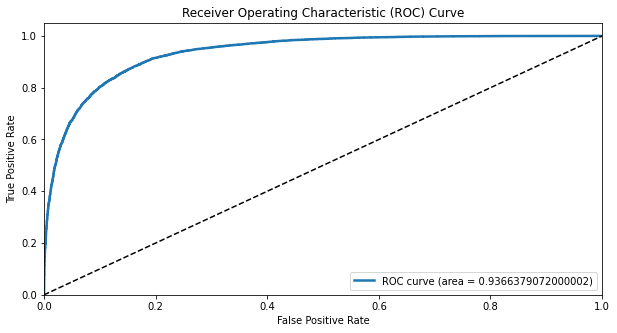

Success!


In [8]:
def check_roc(roc_auc):
    if roc_auc > 0.93:
        print('Success!')
    else:
        raise ValueError('Your model is not good enough!')
        
roc_auc = evaluation.plot_roc(logist_reg, y_test, test_ft)
check_roc(roc_auc)

In [9]:
evaluation.get_performance(logist_reg.predict(test_ft), y_test)

Model Performance metrics:
------------------------------
Accuracy: 0.85892
Precision: 0.8570632709908476
Recall: 0.86152
F1 Score: 0.8592858567723918

Model Classification report:
------------------------------
                    precision    recall  f1-score   support

negative_sentiment       0.86      0.86      0.86     12500
positive_sentiment       0.86      0.86      0.86     12500

          accuracy                           0.86     25000
         macro avg       0.86      0.86      0.86     25000
      weighted avg       0.86      0.86      0.86     25000


Prediction Confusion Matrix:
------------------------------
       0      1
0  10704   1796
1   1731  10769


(0.85892, 0.8570632709908476, 0.86152, 0.8592858567723918)

---
## 5. Feature Engineering with Custom Word Embedding

### Tokenizing reviews and train an own Word Embedding

In [10]:
from nltk.tokenize.toktok import ToktokTokenizer
tokenizer = ToktokTokenizer()

X_train_tokenized=[]
X_test_tokenized=[]

for sentence in X_train:
    X_train_tokenized.append(tokenizer.tokenize(sentence, return_str=False))

for sentence in X_test:
    X_test_tokenized.append(tokenizer.tokenize(sentence, return_str=False))

In [11]:
from gensim.models import Word2Vec

model = Word2Vec(vector_size=100, window=7, min_count=5, workers=4)

model.build_vocab(X_train_tokenized, update=False)

model.train(X_train_tokenized, total_examples=model.corpus_count, epochs=50)

model_w2v = model

### Generating averaged word vector features

In [12]:
import numpy as np

def vectorizer(corpus, model, num_features=100):
    corpus_vectors=[]
    for sentence in corpus:
        words_list=[]
        for word in sentence:
            if word in model.wv.key_to_index:
                words_list.append(model.wv[word])
        corpus_vectors.append(np.mean(words_list, axis=0))
    return corpus_vectors

In [13]:
X_train_vec = vectorizer(X_train_tokenized, model)
X_test_vec = vectorizer(X_test_tokenized, model)

### *Just checking*

In [14]:
def check_embedding(model):
    vector = model.wv['computer']
    if len(vector) == 100:
        print(
            'Success! Your embedding tells me that "women" and "man" '
            f'are similar with a score of {model.wv.similarity("woman", "man")}'
        )
    else:
        raise ValueError('You should check your embedding vector size!')
        
check_embedding(model_w2v)

Success! Your embedding tells me that "women" and "man" are similar with a score of 0.6392621994018555


In [15]:
def check_vectorizer(model):
    vector1 = model.wv['personal']
    vector2 = model.wv['computer']
    avg = vectorizer([['personal', 'computer']], model)[0]

    if np.allclose((vector1 + vector2) / 2, avg):
        print('Success!')
    else:
        raise ValueError('You should check your vectorizer!')
        
check_vectorizer(model_w2v)

Success!


### Modeling

Training a new model to compare the results using BoW/TF-IDF and Word2Vec.

In [16]:
logist_reg.fit(X_train_vec,y_train)

LogisticRegression(C=50000, max_iter=50000, tol=1e-09)

### *Just checking*

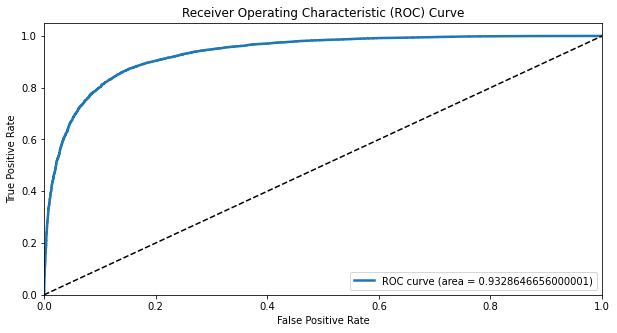

Success!


In [17]:
roc_auc = evaluation.plot_roc(logist_reg, y_test, X_test_vec)
check_roc(roc_auc)

In [18]:
evaluation.get_performance(logist_reg.predict(X_test_vec), y_test)

Model Performance metrics:
------------------------------
Accuracy: 0.85928
Precision: 0.8638204795852236
Recall: 0.85304
F1 Score: 0.8583963934954113

Model Classification report:
------------------------------
                    precision    recall  f1-score   support

negative_sentiment       0.85      0.87      0.86     12500
positive_sentiment       0.86      0.85      0.86     12500

          accuracy                           0.86     25000
         macro avg       0.86      0.86      0.86     25000
      weighted avg       0.86      0.86      0.86     25000


Prediction Confusion Matrix:
------------------------------
       0      1
0  10819   1681
1   1837  10663


(0.85928, 0.8638204795852236, 0.85304, 0.8583963934954113)

---
### Using a `pre-trained Word2Vec models`.

In [19]:
import gensim.downloader
glove_vectors = gensim.downloader.load('glove-wiki-gigaword-200')

In [20]:
def vectorizer_b(corpus, model, num_features=100):
    corpus_vectors=[]
    for sentence in corpus:
        words_list=[]
        for word in sentence:
            if word in model.key_to_index:
                words_list.append(model[word])
        corpus_vectors.append(np.mean(words_list, axis=0))
    return corpus_vectors

X_train_vec_b = vectorizer_b(X_train_tokenized, glove_vectors)
X_test_vec_b = vectorizer_b(X_test_tokenized, glove_vectors)

In [21]:
logist_reg.fit(X_train_vec_b,y_train)

LogisticRegression(C=50000, max_iter=50000, tol=1e-09)

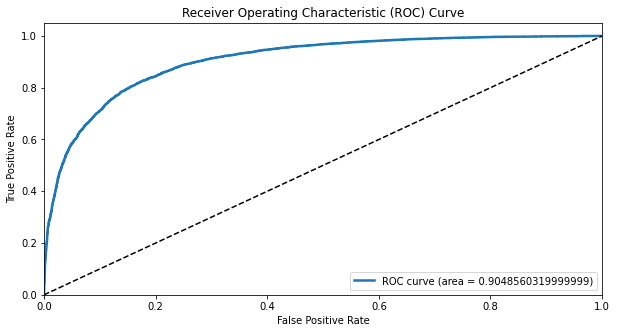

Model Performance metrics:
------------------------------
Accuracy: 0.82488
Precision: 0.8249319891182589
Recall: 0.8248
F1 Score: 0.8248659892791423

Model Classification report:
------------------------------
                    precision    recall  f1-score   support

negative_sentiment       0.82      0.82      0.82     12500
positive_sentiment       0.82      0.82      0.82     12500

          accuracy                           0.82     25000
         macro avg       0.82      0.82      0.82     25000
      weighted avg       0.82      0.82      0.82     25000


Prediction Confusion Matrix:
------------------------------
       0      1
0  10312   2188
1   2190  10310


(0.82488, 0.8249319891182589, 0.8248, 0.8248659892791423)

In [22]:
evaluation.plot_roc(logist_reg, y_test, X_test_vec_b)
evaluation.get_performance(logist_reg.predict(X_test_vec_b), y_test)